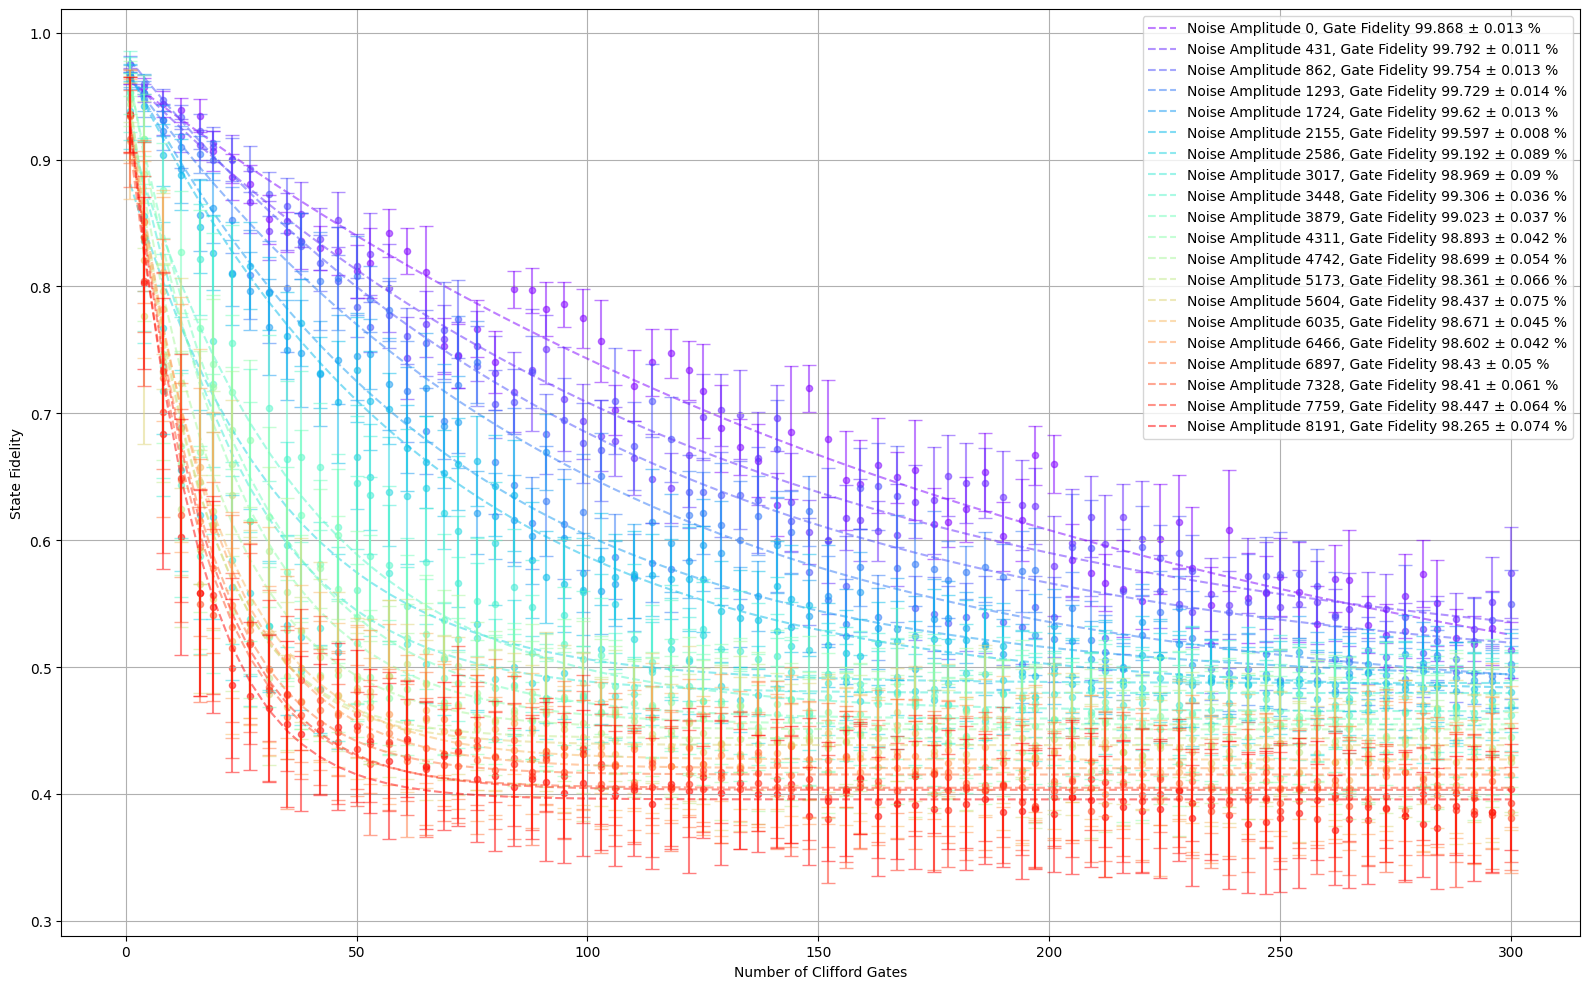

In [2]:
import csv
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pathlib
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, 20))

nfid = []
namp = []
merged = []
merged_id = []

plt.figure(figsize=(16, 10))

merged_id = np.append(merged_id, "xaxis")

for noise_num in range(20):
    fn = f"rb_310523_1422_n{noise_num}"

    with open( "{}.json".format(fn)) as r:
        data = json.load(r)

    results = np.array(data.get("sweep"))
    xaxis = np.array(data.get("x"))
    m = data.get("m")
    noise_amp = int(data.get("noise_amplitude"))
    res = np.zeros(len(xaxis))
    #xaxis = xaxis[xaxis < 82]

    shots = 1000
    rk = []
    perr = []
    for idx, navg in enumerate(results):
        if idx >= len(xaxis):
            break
        #navg = navg / shots
        p_avg = np.average(navg)
        err = np.std(navg)
        #plt.scatter(xn, p_avg, color="red", s=50)
        rk.append(p_avg)
        perr.append(err)

    #plt.plot(xaxis, rk, color=colors[noise_num])
    plt.errorbar(xaxis, rk, yerr=perr, linestyle='', color=colors[noise_num], capsize=5, alpha = 0.5)
    plt.scatter(xaxis, rk, color=colors[noise_num], s=20, alpha = 0.5)
    #plt.plot()


    def rb(x, *p):
        return p[2] - p[0] * np.power(p[1], x)

    pguess = [
        np.mean(rk),
        0.9,
        np.average(rk)
    ]

    popt, pcov = curve_fit(rb, xaxis, rk, p0=pguess, sigma=perr)
    fit = rb(xaxis, *popt)
    a = popt[0]
    b = popt[2]
    p = popt[1]
    cliff_err = (1 - p) * (1 - 1/2)
    gate_err = cliff_err / 1.875
    gate_fidelity = int((1 - gate_err) * 100000) / 1000

    fit_std = np.sqrt(np.diag(pcov))
    p_std = fit_std[1]
    cliff_err_std = p_std * (1 - 1/2)
    gate_err_std = cliff_err_std / 1.875
    gate_fidelity_std = int(gate_err_std * 100000) / 1000

    nfid.append(gate_fidelity)
    namp.append(noise_amp)

    #plt.ylabel("P(|0>)")
    
    plt.plot(xaxis, fit, linestyle='dashed', color=colors[noise_num], label=f"Noise Amplitude {noise_amp}, Gate Fidelity {gate_fidelity} ± {gate_fidelity_std} %", alpha = 0.5)
    merged_id = np.append(merged_id, str(noise_amp))
    merged_id = np.append(merged_id, "StdDev")

    

    if (noise_num == 0): merged = xaxis
    merged = np.vstack([merged, rk])
    merged = np.vstack([merged, perr])
    
#plt.axhline(2000, linestyle='dashed', color='blue', label="Mixed State")
#plt.title(fn)
plt.ylabel("State Fidelity")
plt.xlabel("Number of Clifford Gates")
plt.legend()
plt.grid()
plt.tight_layout()


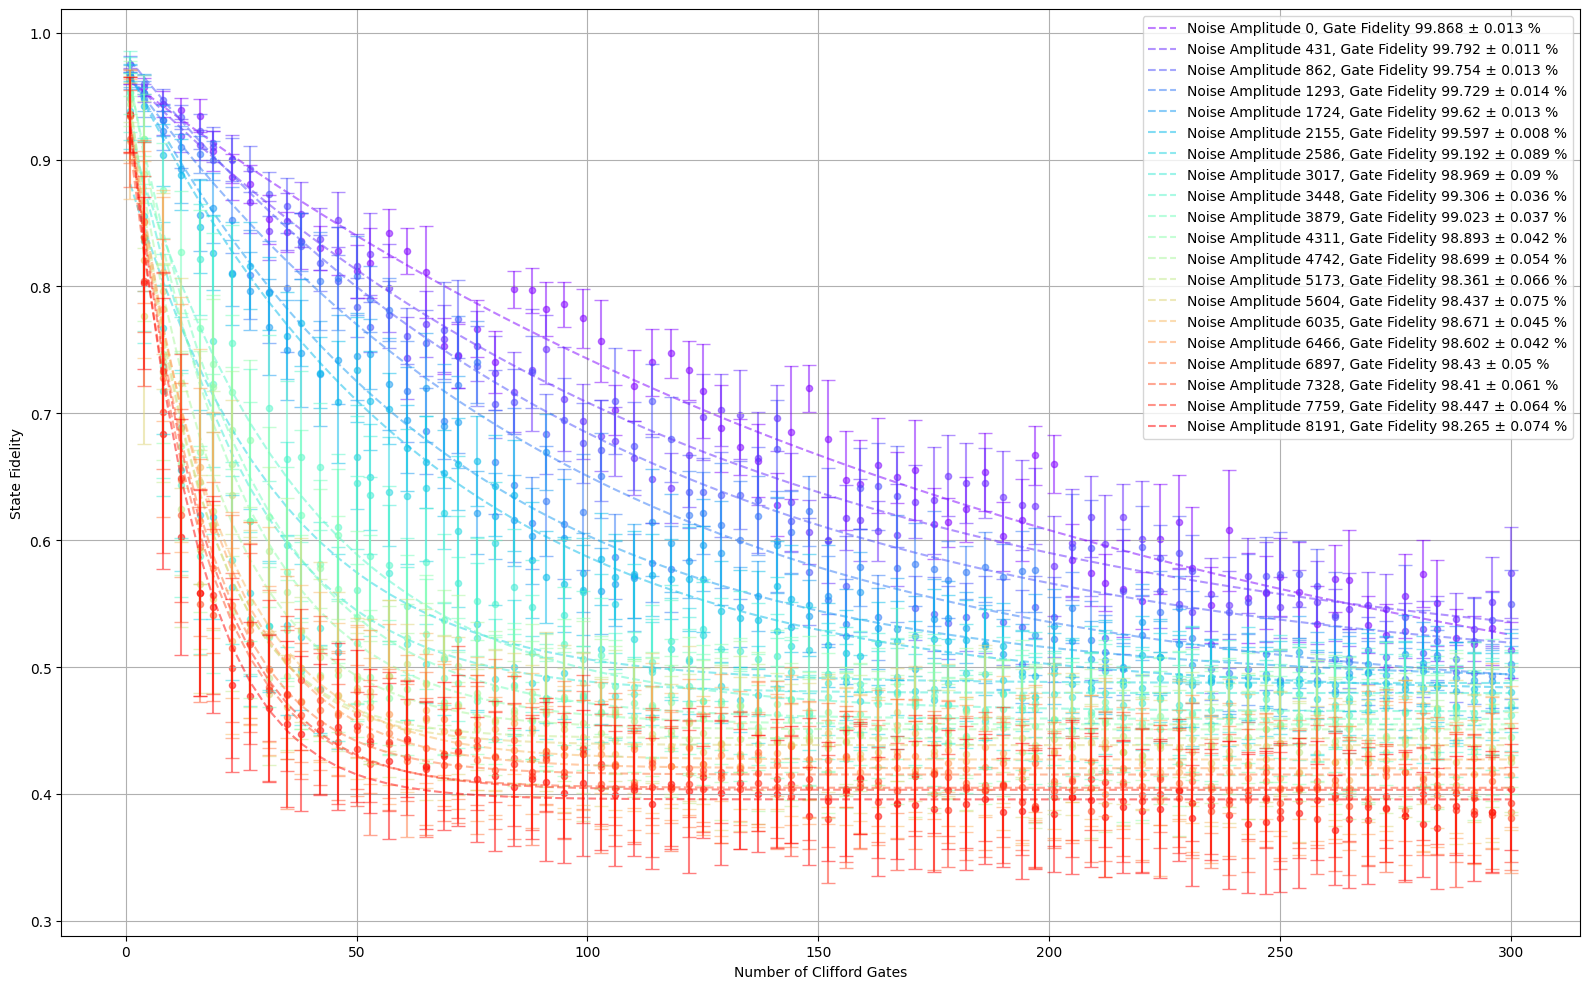

In [13]:
import csv
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pathlib
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, 20))

nfid = []
namp = []
merged = []
merged_id = []

plt.figure(figsize=(16, 10))

merged_id = np.append(merged_id, "xaxis")

for noise_num in range(20):
    fn = f"rb_310523_1422_n{noise_num}"

    with open( "{}.json".format(fn)) as r:
        data = json.load(r)

    results = np.array(data.get("sweep"))
    xaxis = np.array(data.get("x"))
    m = data.get("m")
    noise_amp = int(data.get("noise_amplitude"))
    res = np.zeros(len(xaxis))
    #xaxis = xaxis[xaxis < 82]

    shots = 1000
    rk = []
    perr = []
    for idx, navg in enumerate(results):
        if idx >= len(xaxis):
            break
        #navg = navg / shots
        p_avg = np.average(navg)
        err = np.std(navg)
        #plt.scatter(xn, p_avg, color="red", s=50)
        rk.append(p_avg)
        perr.append(err)

    #plt.plot(xaxis, rk, color=colors[noise_num])
    plt.errorbar(xaxis, rk, yerr=perr, linestyle='', color=colors[noise_num], capsize=5, alpha = 0.5)
    plt.scatter(xaxis, rk, color=colors[noise_num], s=20, alpha = 0.5)
    #plt.plot()


    def rb(x, *p):
        return p[2] - p[0] * np.power(p[1], x)

    pguess = [
        np.mean(rk),
        0.9,
        np.average(rk)
    ]

    popt, pcov = curve_fit(rb, xaxis, rk, p0=pguess, sigma=perr)
    fit = rb(xaxis, *popt)
    a = popt[0]
    b = popt[2]
    p = popt[1]
    cliff_err = (1 - p) * (1 - 1/2)
    gate_err = cliff_err / 1.875
    gate_fidelity = int((1 - gate_err) * 100000) / 1000

    fit_std = np.sqrt(np.diag(pcov))
    p_std = fit_std[1]
    cliff_err_std = p_std * (1 - 1/2)
    gate_err_std = cliff_err_std / 1.875
    gate_fidelity_std = int(gate_err_std * 100000) / 1000

    nfid.append(gate_fidelity)
    namp.append(noise_amp)

    #plt.ylabel("P(|0>)")
    
    plt.plot(xaxis, fit, linestyle='dashed', color=colors[noise_num], label=f"Noise Amplitude {noise_amp}, Gate Fidelity {gate_fidelity} ± {gate_fidelity_std} %", alpha = 0.5)
    merged_id = np.append(merged_id, str(noise_amp))
    merged_id = np.append(merged_id, "StdDev")

    

    if (noise_num == 0): merged = xaxis
    merged = np.vstack([merged, rk])
    merged = np.vstack([merged, perr])

    np.savetxt(f"noise_amplitude_{noise_num}.txt",[rk,fit,perr,xaxis])
    
#plt.axhline(2000, linestyle='dashed', color='blue', label="Mixed State")
#plt.title(fn)
plt.ylabel("State Fidelity")
plt.xlabel("Number of Clifford Gates")
plt.legend()
plt.grid()
plt.tight_layout()


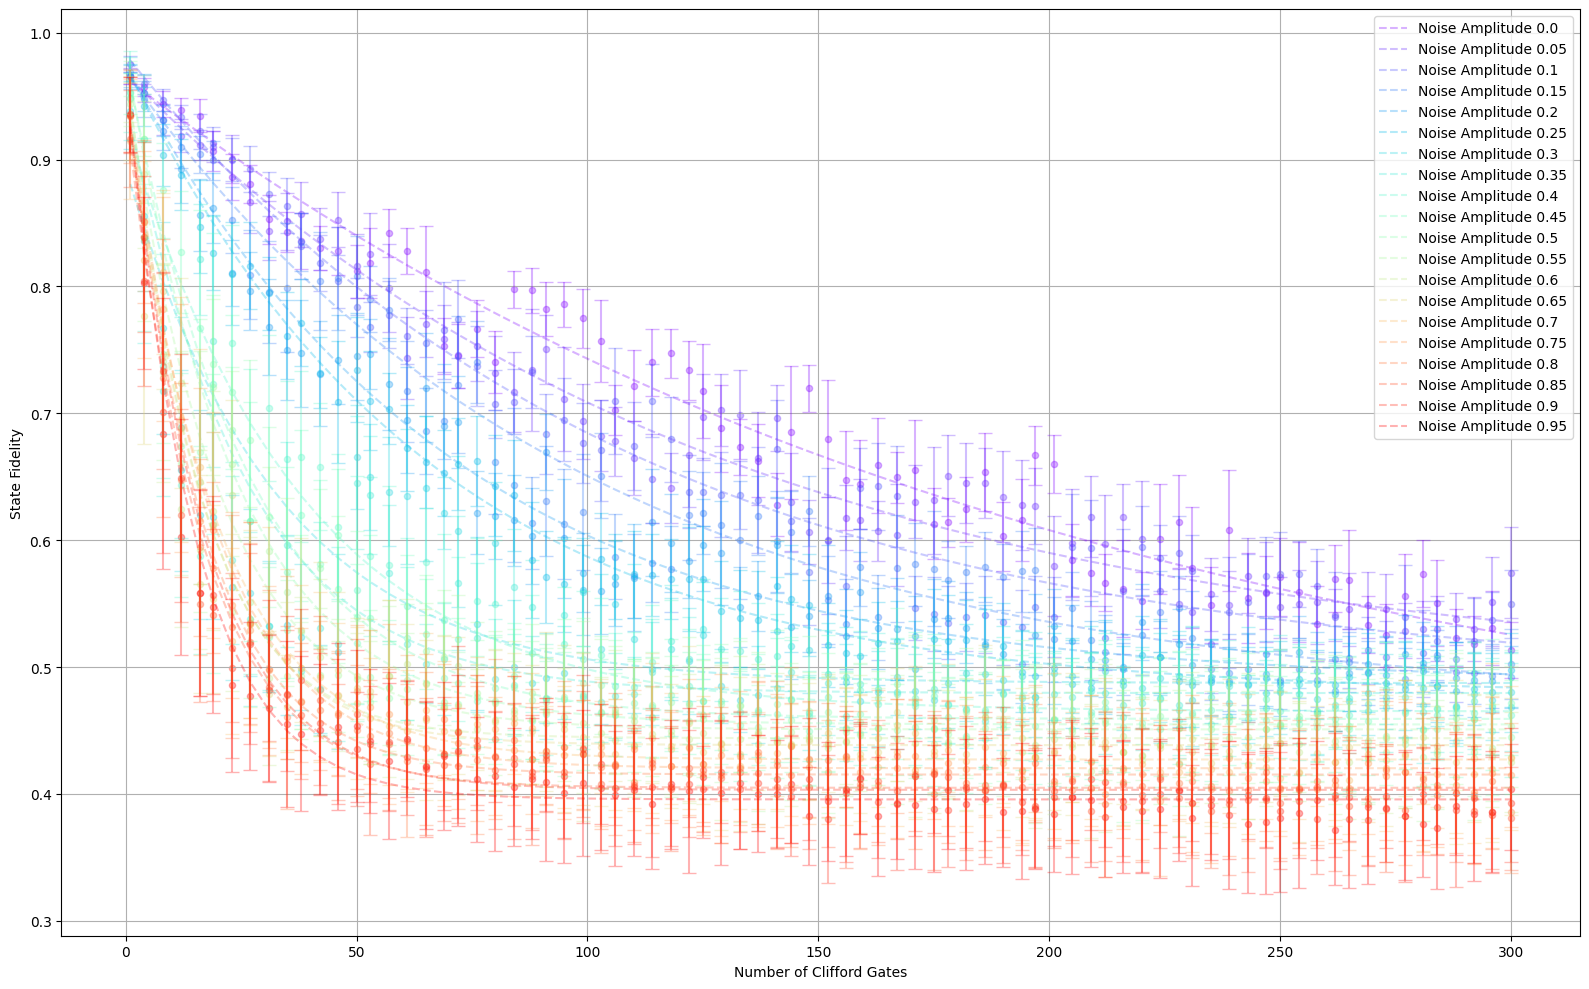

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, 20))
plt.figure(figsize=(16, 10))

for noise_num in range(20):
    rk,fit,perr,xaxis = np.loadtxt(f'noise_amplitude_{noise_num}.txt')
    plt.errorbar(xaxis, rk, yerr=perr, linestyle='', color=colors[noise_num], capsize=5, alpha = 0.3)
    plt.scatter(xaxis, rk, color=colors[noise_num], s=20, alpha = 0.3)
    plt.plot(xaxis, fit, linestyle='dashed', color=colors[noise_num], label=f"Noise Amplitude {noise_num/20}", alpha = 0.3)

plt.ylabel("State Fidelity")
plt.xlabel("Number of Clifford Gates")
plt.legend()
plt.grid()
plt.tight_layout()
    